<a href="https://colab.research.google.com/github/aminafysel/IBM-COURSERA-CAPSTONE-PROJECT/blob/master/Data_analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import folium 
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
!pip install geopy
!pip install geocoder
!pip install geopandas
from geopy.geocoders import Nominatim
import geocoder
import matplotlib.pyplot as plt
import geopandas as gpd



#DATA COLLECTION AND SOLUTIONING
#Data Collection - Top  5 Districts with Psychosocial issues

url = 'https://dashboard.kerala.gov.in/psycosocial.php'
dfs = pd.read_html(url,header=0)
dfs
#Getting Type of Discomfort Data for each district
TypeOfDiscomfortTable = pd.pivot_table(dfs[1], index=['District'])
TypeOfDiscomfortTable.sort_values(by=['Anxiety'], inplace=True,ascending=False)
TypeOfDiscomfortTable = TypeOfDiscomfortTable.reset_index()
#Removing the row "TOTAL"
TypeOfDiscomfortTable.drop([0], axis=0, inplace = True)
index = TypeOfDiscomfortTable.Anxiety.argmax()
#TypeOfDiscomfortTable.iloc[TypeOfDiscomfortTable.Anxiety.argmax(), 0:2]
TypeOfDiscomfortTable.nlargest(5,'Anxiety')
#Top Anxiety Districts
DiscomfortTableAnxietyRank = TypeOfDiscomfortTable.nlargest(5,'Anxiety')
DiscomfortTableAnxietyRankCopy = DiscomfortTableAnxietyRank
DiscomfortTableAnxietyRank = DiscomfortTableAnxietyRank.drop(columns=['Stress','Anxiety','Any other Psychiatric Issues','Depression','Sleep Impairment','Social Needs','Stigma Issues'])
DiscomfortTableAnxietyRank.insert(1, "Points", [25, 20, 15, 10,5], True) 
#Top Depression Districts
DiscomfortTableDepressionRank = TypeOfDiscomfortTable.nlargest(5,'Depression')
DiscomfortTableDepressionRankCopy = DiscomfortTableDepressionRank
DiscomfortTableDepressionRank = DiscomfortTableDepressionRank.drop(columns=['Anxiety','Depression','Stress','Any other Psychiatric Issues','Sleep Impairment','Social Needs','Stigma Issues'])
DiscomfortTableDepressionRank.insert(1, "Points", [25, 20, 15, 10,5], True) 
#Top Stress Districts
DiscomfortTableStressRank = TypeOfDiscomfortTable.nlargest(5,'Stress')
DiscomfortTableStressRankCopy = DiscomfortTableStressRank
DiscomfortTableStressRank = DiscomfortTableStressRank.drop(columns=['Anxiety','Stress','Any other Psychiatric Issues','Depression','Sleep Impairment','Social Needs','Stigma Issues'])
DiscomfortTableStressRank.insert(1, "Points", [25, 20, 15, 10,5], True) 

#Top Stress Districts
DiscomfortTableSocialNeedsRank = TypeOfDiscomfortTable.nlargest(5,"Social Needs")
DiscomfortTableSocialNeedsRankCopy = DiscomfortTableSocialNeedsRank
DiscomfortTableSocialNeedsRank = DiscomfortTableSocialNeedsRank.drop(columns=['Anxiety','Stress','Any other Psychiatric Issues','Depression','Sleep Impairment','Social Needs','Stigma Issues'])
DiscomfortTableSocialNeedsRank.insert(1, "Points", [25, 20, 15, 10,5], True) 

print (DiscomfortTableAnxietyRank)
print (DiscomfortTableDepressionRank)
print(DiscomfortTableStressRank)
print(DiscomfortTableSocialNeedsRank)

#Combining all tables
frames = [DiscomfortTableAnxietyRank, DiscomfortTableDepressionRank, DiscomfortTableStressRank,DiscomfortTableSocialNeedsRank]
PsychoSocialRank = pd.concat(frames)
#To resolve Nan issues with concat
PsychoSocialRankCopy = PsychoSocialRank
#Grouping with district
PsychoSocialRank = PsychoSocialRank.groupby(['District']).agg({'Points':sum})
#Top 5 districts with PsychoSocial issues 
PsychoSocialRank = PsychoSocialRank.nlargest(5, 'Points')
print("PsychoSocial Rank")
print(PsychoSocialRank)

#Data Collection - Top  5 Districts with maximum Containment Zones
url2 = 'https://dashboard.kerala.gov.in/hotspots.php'
dfs1 = pd.read_html(url2,header=0)

ContainmentZoneTable = dfs1[0].groupby(['District']).size().nlargest(5).reset_index(name='Count')
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Kannur', 'District'] = 'KNR' 
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Kasargode', 'District'] = 'KSD'    
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Palakkad', 'District'] = 'PKD'
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Ernakulam', 'District'] = 'EKM'
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Alappuzha', 'District'] = 'ALPY'
ContainmentZoneTable.loc[ContainmentZoneTable.District == 'Kollam', 'District'] = 'KLM'
ContainmentZoneTable.insert(1, "Points", [25, 20, 15, 10,5], True) 
ContainmentZoneTable = ContainmentZoneTable.drop(columns=['Count'])
#ContainmentZoneTable = ContainmentZoneTable.drop(ContainmentZoneTable.columns[0], axis = 1) 

print("ContainmentZone Rank")
print (ContainmentZoneTable)

#Data Collection - Top  5 Districts with maximum Hospitals 
url3 = 'https://www.hospitalskerala.com/trivandrum_hospitals/trivandrum_hospitals.html'
dfs2 = pd.read_html(url3,header=0)
frames2 = [dfs2[1], dfs2[2],dfs2[3],dfs2[4]]
TVMHospitals = pd.concat(frames2)
TvmHosCount =  (len(TVMHospitals.index))
data = [['TVPM',TvmHosCount] ]
  
# Create the HospitalRank Table with TVM
HospitalRank = pd.DataFrame(data, columns = ['District', 'Count']) 

#EKM
url3 = 'https://www.hospitalskerala.com/ernakulam_hospitals/ernakulam_hospitals.html'
dfs3 = pd.read_html(url3,header=0)
frames3 = [dfs3[1],dfs3[2],dfs3[3],dfs3[4],dfs3[5]]
EKMHospitals = pd.concat(frames3)
EKMHosCount =  (len(EKMHospitals.index))
Ekmdf = {'District': 'EKM', 'Count': EKMHosCount}
HospitalRank = HospitalRank.append(Ekmdf, ignore_index=True)

#KKD
url3 = 'https://www.hospitalskerala.com/kozhikode_hospitals/calicut_hospitals.html'
dfs3 = pd.read_html(url3,header=0)
frames3 = [dfs3[1],dfs3[2],dfs3[3],dfs3[4],dfs3[5]]
KKDHospitals = pd.concat(frames3)
KKDHosCount =  (len(KKDHospitals.index))
Kkddf = {'District': 'KKD', 'Count': KKDHosCount}
HospitalRank = HospitalRank.append(Kkddf, ignore_index=True)
HospitalRank
#MLP
url3 = 'https://www.hospitalskerala.com/malappuram_hospitals/malappuram_hospitals.html'
dfs3 = pd.read_html(url3,header=0)
frames3 = [dfs3[1],dfs3[2],dfs3[3],dfs3[4],dfs3[5]]
MLPHospitals = pd.concat(frames3)
MLPHosCount =  (len(MLPHospitals.index))
Mlpdf = {'District': 'MLP', 'Count': MLPHosCount}
HospitalRank = HospitalRank.append(Mlpdf, ignore_index=True)
HospitalRank

#TSR
url3 = 'https://www.hospitalskerala.com/thrissur_hospitals/thrissur_hospitals.html'
dfs3 = pd.read_html(url3,header=0)
frames3 = [dfs3[1],dfs3[2],dfs3[3],dfs3[4],dfs3[5]]
TSRHospitals = pd.concat(frames3)
TSRHosCount =  (len(TSRHospitals.index))
Tsrdf = {'District': 'TSR', 'Count': TSRHosCount}
HospitalRank = HospitalRank.append(Tsrdf, ignore_index=True)

#KLM
url3 = 'https://www.hospitalskerala.com/kollam_hospitals/kollam_hospitals.html'
dfs3 = pd.read_html(url3,header=0)
frames3 = [dfs3[1],dfs3[2],dfs3[3],dfs3[4],dfs3[5]]
KLMHospitals = pd.concat(frames3)
KLMHosCount =  (len(KLMHospitals.index))
Klmdf = {'District': 'KLM', 'Count': KLMHosCount}
HospitalRank = HospitalRank.append(Klmdf, ignore_index=True)

#Top 5 ditrsicts
HospitalRank.insert(1, "Points", [25, 20, 15, 10,5,1], True) 
HospitalRank = HospitalRank.drop(columns=['Count'])
HospitalRank = HospitalRank.nlargest(5, 'Points')
print("HospitalRank Rank")
print (HospitalRank)

#Merge all 3 tables to find the proposed Revie location !!! 
frames4 = [ContainmentZoneTable,HospitalRank,PsychoSocialRankCopy]
ReviewKeralaLocation = pd.concat(frames4,ignore_index=True)
ReviewKeralaLocation = ReviewKeralaLocation.groupby(['District']).agg({'Points':sum})
#Top 5 districts 
ReviewKeralaLocation = ReviewKeralaLocation.nlargest(5, 'Points')
print("Review Kerala Location Rank")
print(ReviewKeralaLocation)

#VISUALIZATION

#Visualize ReviewKeralaLocation districts in Map
#Vislualize ContainmentZoneTable as Chart
#Vislualize HospitalRank as plot 
# PsychoSocialRankCopy as piechart



  District  Points
1      KKD      25
2      MLP      20
3      EKM      15
4      KSD      10
5      TSR       5
   District  Points
5       TSR      25
1       KKD      20
6      TVPM      15
10      WYD      10
2       MLP       5
  District  Points
3      EKM      25
2      MLP      20
9      PTA      15
5      TSR      10
8      KLM       5
   District  Points
8       KLM      25
4       KSD      20
10      WYD      15
2       MLP      10
12      PKD       5
PsychoSocial Rank
          Points
District        
MLP           55
KKD           45
EKM           40
TSR           40
KLM           30
ContainmentZone Rank
  District  Points
0      KNR      25
1      KSD      20
2      EKM      15
3     ALPY      10
4      KLM       5
HospitalRank Rank
  District  Points
0     TVPM      25
1      EKM      20
2      KKD      15
3      MLP      10
4      TSR       5
Review Kerala Location Rank
          Points
District        
EKM           75
MLP           65
KKD           60
KSD           5

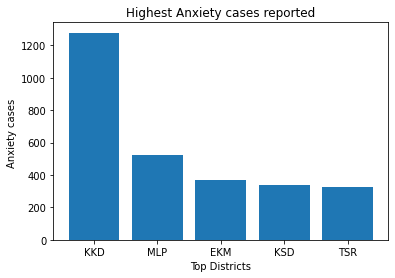

In [ ]:
# Anxiety
fig=plt.figure()
plt.bar(DiscomfortTableAnxietyRankCopy.District,DiscomfortTableAnxietyRankCopy.Anxiety)
plt.xlabel('Top Districts')
plt.ylabel('Anxiety cases ')
plt.title('Highest Anxiety cases reported')
plt.show()

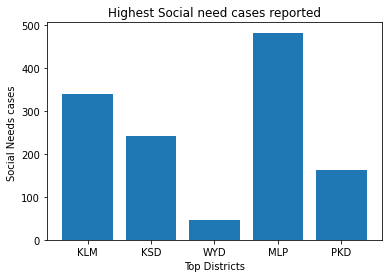

In [ ]:
# Social Needs
fig=plt.figure()
plt.bar(DiscomfortTableSocialNeedsRankCopy.District,DiscomfortTableSocialNeedsRankCopy.Stress)
plt.xlabel('Top Districts')
plt.ylabel('Social Needs cases ')
plt.title('Highest Social need cases reported')
plt.show()

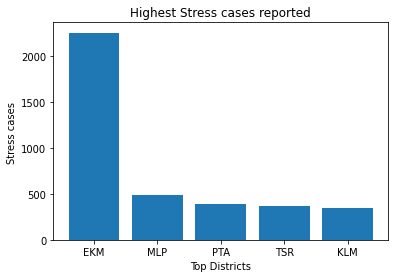

In [ ]:
# Stress 
#print (DiscomfortTableAnxietyRank)
#print (DiscomfortTableDepressionRank)
#print(DiscomfortTableStressRank)
#print(DiscomfortTableSocialNeedsRank)
fig=plt.figure()
plt.bar(DiscomfortTableStressRankCopy.District,DiscomfortTableStressRankCopy.Stress)
plt.xlabel('Top Districts')
plt.ylabel('Stress cases ')
plt.title('Highest Stress cases reported')
plt.show()

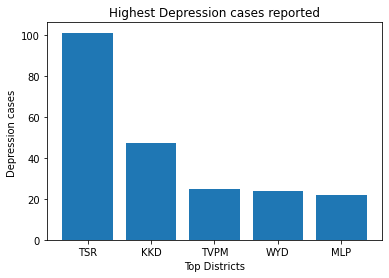

In [ ]:
# Depression 
fig=plt.figure()
plt.bar(DiscomfortTableDepressionRankCopy.District,DiscomfortTableDepressionRankCopy.Depression)
plt.xlabel('Top Districts')
plt.ylabel('Depression cases ')
plt.title('Highest Depression cases reported')
plt.show()

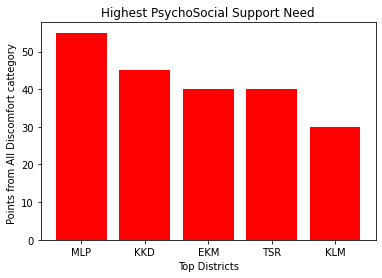

In [ ]:
#PsychoSocialRank
fig=plt.figure()
District=['MLP','KKD','EKM','TSR','KLM']
Values=[55,45,40,40,30]
plt.bar(District,Values,color = 'r')
plt.xlabel('Top Districts')
plt.ylabel('Points from All Discomfort cattegory ')
plt.title('Highest PsychoSocial Support Need')
plt.show()

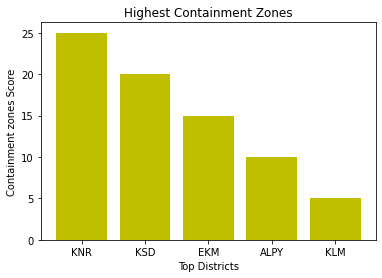

In [ ]:
# containment zone table
fig=plt.figure()


barlist = plt.bar(ContainmentZoneTable.District,ContainmentZoneTable.Points,color='y')

plt.xlabel('Top Districts')
plt.ylabel('Containment zones Score')
plt.title('Highest Containment Zones')
plt.show()

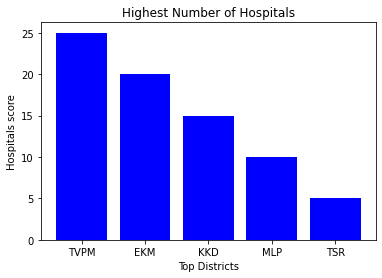

In [ ]:
fig=plt.figure()


barlist = plt.bar(HospitalRank.District,HospitalRank.Points,color='b')

plt.xlabel('Top Districts')
plt.ylabel('Hospitals score')
plt.title('Highest Number of Hospitals')
plt.show()

          Points
District        
EKM           75
MLP           65
KKD           60
KSD           50
TSR           45


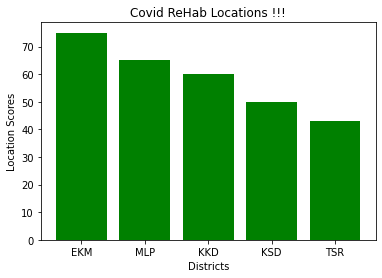

In [ ]:
fig=plt.figure()

District=['EKM','MLP','KKD','KSD','TSR']
Values=[75,65,60,50,43]
plt.bar(District,Values,color = 'g')
print(ReviewKeralaLocation)

#barlist = plt.bar(ReviewKeralaLocation.District,ReviewKeralaLocation.Points,color='g')

plt.xlabel('Districts')
plt.ylabel('Location Scores')
plt.title('Covid ReHab Locations !!!')
plt.show()

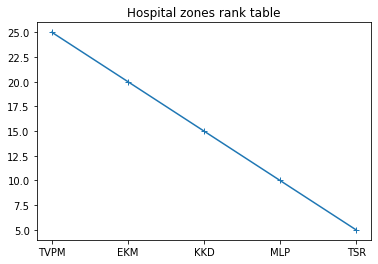

In [ ]:
#Hospital rank table
#District=['TVM','EKM','KKD','MLP','TSR']
#Values=[25,20,15,10,5]
#plt.plot(District,Values,marker='+')
plt.plot(HospitalRank.District,HospitalRank.Points,marker = '+')
plt.title('Hospital zones rank table')
plt.show()
